# **Heart Disease (Cleveland) – Identificação de pacientes com doença cardíaca**

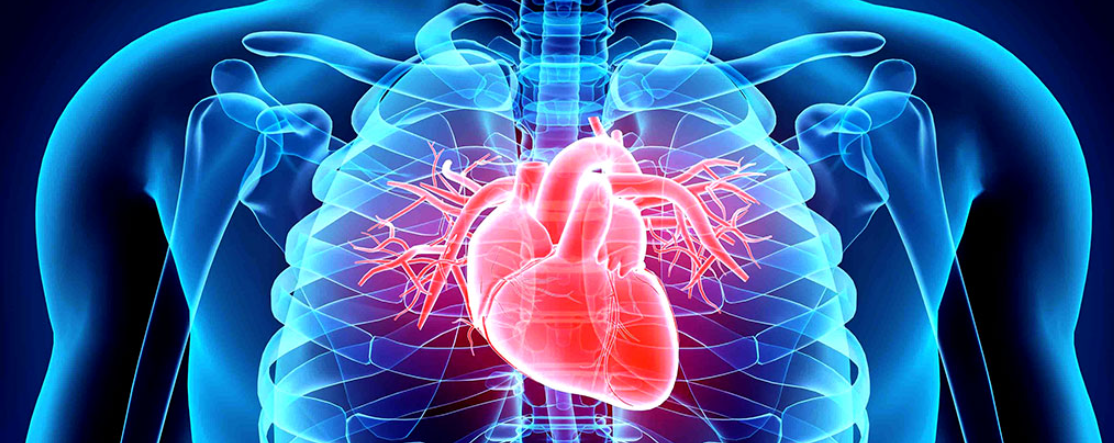

# **Informações gerais do Dataframe**

## **Existem 14 atributos:**

- **age**: idade em anos
- **sex**: sexo (1 = masculino; 0 = feminino)
- **cp**: (chest pain) tipo de dor no peito
    - Valor 0: angina típica
    - Valor 1: angina atípica
    - Valor 2: dor não anginosa
    - Valor 3: assintomático

- **trestbps**: pressão arterial em repouso (em mm Hg na admissão hospitalar)
- **chol**: colesterol sérico em mg/dl
- **fbs**: (açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)
- **restecg**: resultados do eletrocardiograma em repouso
    - Valor 0: normal
    - Valor 1: anormalidade da onda ST-T (inversões de onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
    - Valor 2: hipertrofia ventricular esquerda provável ou definitiva segundo os critérios de Estes

- **thalach**: frequência cardíaca máxima alcançada
- **exang**: angina induzida por exercício (1 = sim; 0 = não)
- **oldpeak**: depressão do segmento ST induzida por exercício em relação ao repouso
- **slope**: inclinação do segmento ST no exercício máximo
    - Valor 0: ascendente
    - Valor 1: plano
    - Valor 2: descendente

- **ca**: número de principais vasos (0–3) visualizados por fluoroscopia
- **thal**: 0 = normal; 1 = defeito fixo; 2 = defeito reversível

- **condition**: 0 = sem doença, 1 = com doença

#**1. Pré-processamento dos dados**
##**Importações e visualização do DataFrame**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


##**Overview dos dados da tabela**
- Identificação das colunas presentes no DataFrame.
- Verificação da quantidade total de registros em cada coluna.
- Análise dos tipos de dados associados a cada coluna.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


##**Verificando a presença de dados nulos**

In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0


- Não há valores nulos no DataFrame

##**Separando os dados de Treino/Teste**

### Teste = 20%
### Treino = 80%

In [9]:
from sklearn.model_selection import train_test_split

# Suponha que X são suas features e y o target
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (237, 13)
Teste: (60, 13)


#**2. Modelos de previsão**

- Definindo o Random State para 42 (padrão).
- Pipeline > Standard Scaler e uso de validação cruzada com GridSearchCV para encontrar a melhor combinação de hiperparâmetros para o modelo SVM.
- Acurácia média e desvio padrão.
- Demonstração da matriz de confusão.


In [10]:
RANDOM_STATE = 42

#Definição do pipeline (modelo)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=RANDOM_STATE))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("SVM padrão sem hiperparâmetros")
print(classification_report(y_test, y_pred))
print("Acurácia com SVM padrão sem hiperparâmetros:", accuracy_score(y_test, y_pred))

# Parâmetros a serem testados (no GridSearchCV)
parametros = {
    "svm__C": [0.01, 0.1, 1, 10, 100],
    "svm__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "svm__gamma": ["scale", 0.01, 0.001 ]
}

SVM padrão sem hiperparâmetros
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

Acurácia com SVM padrão sem hiperparâmetros: 0.7333333333333333


#**3. Validação dos modelos de previsão**
## **Testando KFold=10**

Melhores hiperparâmetros (Heart Desease): {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Melhor score de validação (Heart Desease): 0.8652173913043478
Score médio de validação (cv) do melhor modelo: 0.87 ± 0.06
=== Melhor modelo após GridSearch ===
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60

Acurácia teste (melhor combinação): 0.7333333333333333


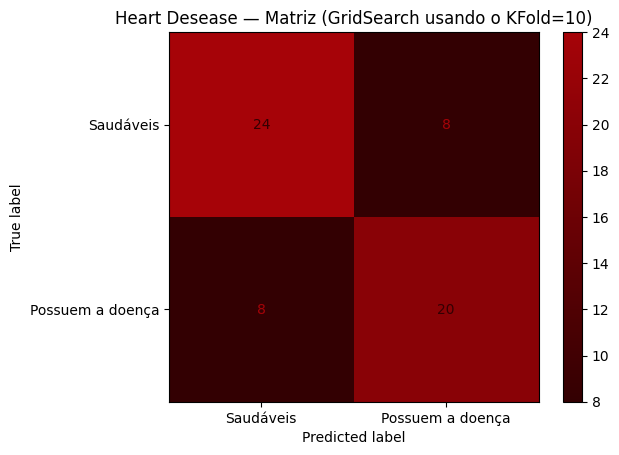

In [11]:
# Validação cruzada utilizando o GridSearchCV
cv10 = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(pipeline, parametros, cv=cv10, n_jobs=-1)
grid.fit(X_train, y_train)

print("Melhores hiperparâmetros (Heart Desease):", grid.best_params_)
print("Melhor score de validação (Heart Desease):", grid.best_score_)

# Média e desvio padrão da validação cruzada
best_index = grid.best_index_
mean_score = grid.cv_results_["mean_test_score"][best_index]
std_score = grid.cv_results_["std_test_score"][best_index]
print(f"Score médio de validação (cv) do melhor modelo: {mean_score:.2f} ± {std_score:.2f}")

# Melhor combinação de hiperparâmetros
best_model = grid.best_estimator_
ypred_best = best_model.predict(X_test)

print("=== Melhor modelo após GridSearch ===")
print(classification_report(y_test, ypred_best))
print("Acurácia teste (melhor combinação):", accuracy_score(y_test, best_model.predict(X_test)))

# Matriz de confusão

#Definição de mapa de cores
colors = ["#330002", "#a60308"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red", colors)

class_names_heart = ["Saudáveis", "Possuem a doença"]
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=class_names_heart, cmap=custom_cmap)

plt.title("Heart Desease — Matriz (GridSearch usando o KFold=10)")
plt.show()

**Conclusão da Matriz de Confusão**

De um total de 60 pessoas na base de teste:
- ✅***24 → verdadeiros negativos (TN)***: Ou seja, 24 pessoas que não têm doença foram corretamente classificadas pelo modelo.

- ❌ ***8 → falsos positivos (FP):*** O modelo disse que 8 pessoas saudáveis têm doença.

- ❌***8 → falsos negativos (FN):*** O modelo não detectou a doença em 8 pacientes que de fato possuem a doença.

- ✅***20 → verdadeiros positivos (TP):*** O modelo acertou 20 pacientes doentes.

De 60 pessoas, o modelo diagnosticou incorretamente 16 pacientes, correspondendo a aproximadamente 27% da amostra, confirmando uma acurácia de 73%.

## **Testando StratiFiedKFold=8**

Melhores hiperparâmetros (Heart Desease): {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'}
Melhor score de validação (Heart Desease): 0.8734195402298851
Score médio de validação (cv) do melhor modelo: 0.87 ± 0.05
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.71      0.71      0.71        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60

Acurácia teste (Heart Desease, melhor combinação): 0.7333333333333333


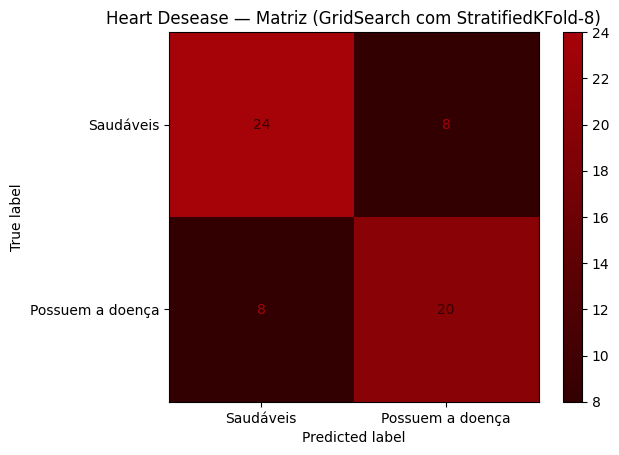

In [12]:
cv8 = StratifiedKFold(n_splits=8, shuffle=True, random_state=RANDOM_STATE)

# Validação cruzada utilizando o GridSearchCV
grid8 = GridSearchCV(pipeline, parametros, cv=cv8, n_jobs=-1)
grid8.fit(X_train, y_train)

print("Melhores hiperparâmetros (Heart Desease):", grid8.best_params_)
print("Melhor score de validação (Heart Desease):", grid8.best_score_)

# Média e desvio padrão da validação cruzada
best_index = grid8.best_index_
mean_score = grid8.cv_results_["mean_test_score"][best_index]
std_score = grid8.cv_results_["std_test_score"][best_index]
print(f"Score médio de validação (cv) do melhor modelo: {mean_score:.2f} ± {std_score:.2f}")

# Melhor combinação de hiperparâmetros
best_model_b = grid8.best_estimator_
ypred_best = best_model_b.predict(X_test)
print(classification_report(y_test, ypred_best))
print("Acurácia teste (Heart Desease, melhor combinação):", accuracy_score(y_test, ypred_best))

# Matriz de confusão

#Definição de mapa de cores
colors = ["#330002", "#a60308"]
custom_cmap = LinearSegmentedColormap.from_list("custom_red", colors)

class_names_heart = ["Saudáveis", "Possuem a doença"]
ConfusionMatrixDisplay.from_estimator(
    best_model_b,
    X_test,
    y_test,
    display_labels=class_names_heart,
    cmap=custom_cmap)

plt.title("Heart Desease — Matriz (GridSearch com StratifiedKFold-8)")
plt.show()

# **Resultado dos testes KFold=10 e StratiFiedKFold=8**
- Em ambos os modelos, tivemos o mesmo score de acurácia no teste = 73%

### **Usando o KFold=10**

- Melhores hiperparâmetros: *{'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}*
- Melhor score de validação: *0.8652173913043478*
- Score médio de validação (cv) do melhor modelo: *0.87 ± 0.06*
- Acurácia teste (melhor combinação): *0.73*

### **Usando o StratiFiedKFold=8**

- Melhores hiperparâmetros: *{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'}*
- Melhor score de validação: *0.8734195402298851*
- Score médio de validação (cv) do melhor modelo: *0.87 ± 0.05*
- Acurácia teste (melhor combinação): *0.73*

# **4. Avaliação dos dois modelos testados**
### **Conclusão dos modelos**
- A escolha do tipo de validação cruzada (CV) influenciou a seleção dos hiperparâmetros, mesmo que a acurácia final no conjunto de teste tenha permanecido igual para ambos os modelos.

- Funciona mais ou menos assim: o GridSearch testa várias configurações diferentes do modelo, como se fosse experimentando receitas diferentes de um mesmo prato. Para cada configuração, ele repete o processo várias vezes, seguindo as regras da validação cruzada escolhida. Em um caso, ele precisou repetir mais vezes; no outro, menos. Ou seja, o número de “passos” até chegar na melhor combinação de ajustes variou conforme o tipo de validação usado.

- O *StratifiedKFold-8* apresentou um score médio ligeiramente maior e um desvio padrão menor (0.05 vs 0.06), indicando maior estabilidade e consistência em comparação ao *KFold-10*.

Sendo assim, o *StratifiedKFold-8* se mostrou ligeiramente melhor, proporcionando um pouco mais de estabilidade na previsão dos dados.